### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


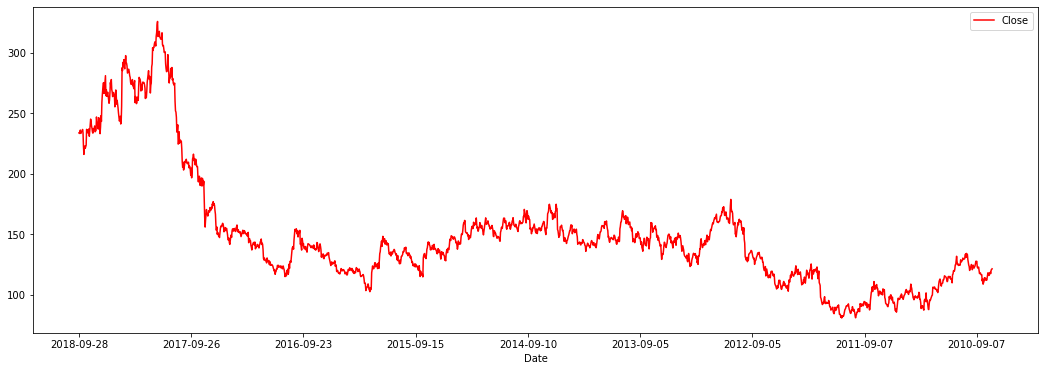

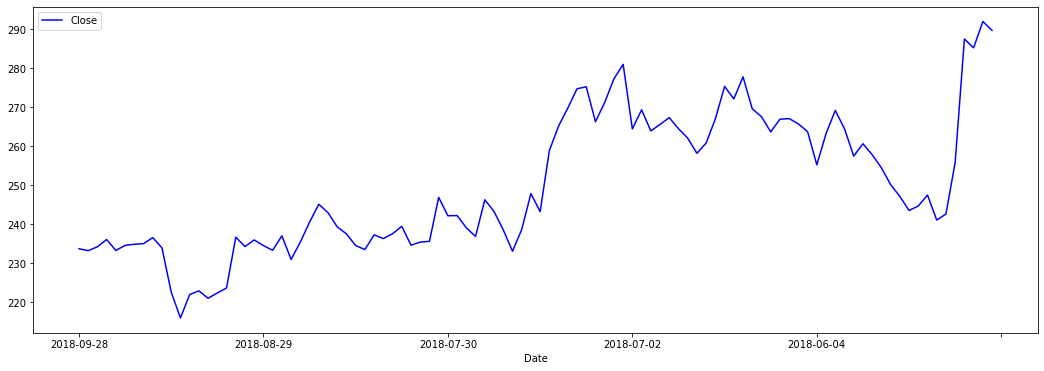

In [5]:
plt.rcParams['figure.figsize']=(18,6)
df.plot('Date','Close',color='red')
new_data=df.head(100)
new_data.plot('Date','Close',color='blue')
plt.show()

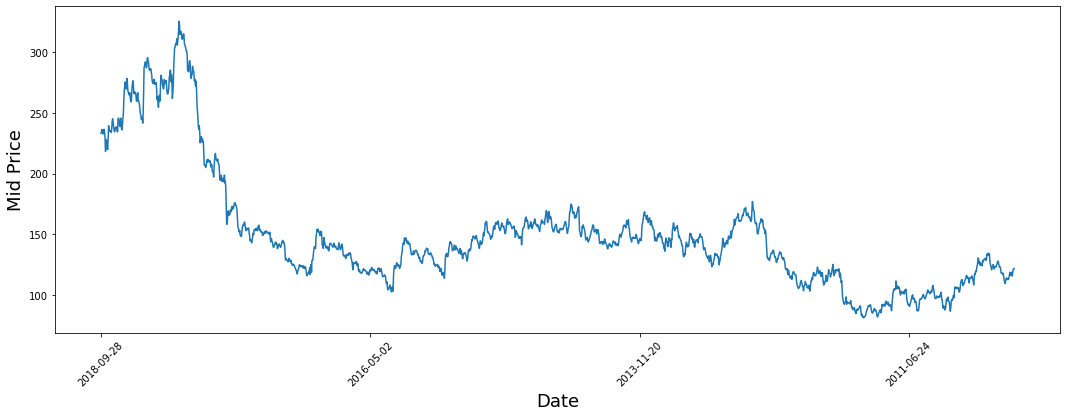

In [6]:
plt.rcParams['figure.figsize']=(18,6)
plt.plot(range(df.shape[0]),(df['High']+df['Low'])/2.0)
plt.xticks(range(0,df.shape[0],600),df['Date'].loc[::600],rotation=45)
plt.xlabel('Date',fontsize='18')
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1) #features
print(X_train.shape)
y_train = train['Close'] #target

(1628, 1)


In [9]:
model=LinearRegression() #model creation
model.fit(X_train,y_train) #training the model

LinearRegression()

In [10]:
print("Slope",model.coef_)#means with 1 unit increase in the date the closing price increases by 0.17$
print("Intercept",model.intercept_)

Slope [-0.05712181]
Intercept 207.1128234022444


In [11]:
pred=model.predict(X_train)
print(pred)

[188.71959914 165.81375154 128.34184125 ... 112.69046408 175.18172911
 168.04150231]


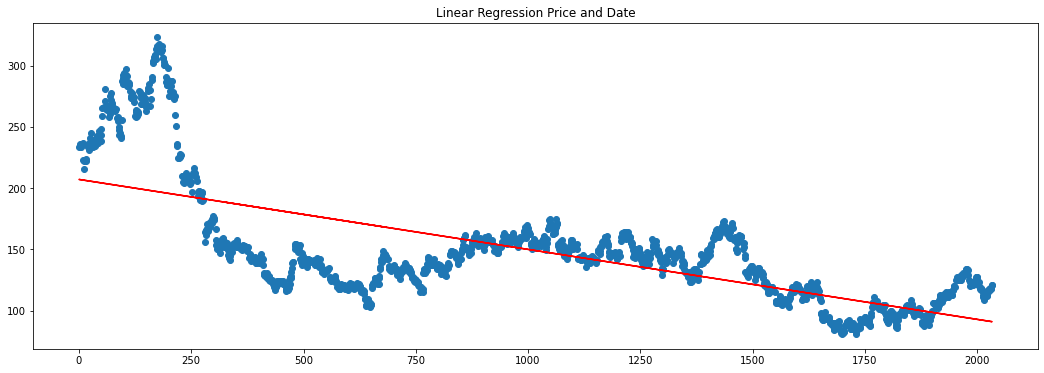

In [12]:
plt.rcParams['figure.figsize']=(18,6)
plt.title('Linear Regression Price and Date')
plt.scatter(X_train,y_train,label='Actual Price')
plt.plot(X_train,pred,color='r',label='Predicted Price')
plt.show()

In [13]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_pred = model.predict(X_test)

In [14]:
df_sample=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':y_pred,'Error':(y_test-y_pred)}).head(10)
df_sample

,Date,Actual,Prediction,Error
704,2015-11-26,134.95,166.899066,-31.949066
1200,2013-11-20,145.35,138.566646,6.783354
1166,2014-01-08,157.10,140.508788,16.591212
1245,2013-09-13,152.15,135.996164,16.153836
1559,2012-06-12,112.05,118.059915,-6.009915
1467,2012-10-23,156.95,123.315122,33.634878
1154,2014-01-24,144.25,141.194250,3.055750
906,2015-02-02,163.60,155.360459,8.239541
1550,2012-06-25,109.45,118.574011,-9.124011
536,2016-08-01,141.00,176.495531,-35.495531


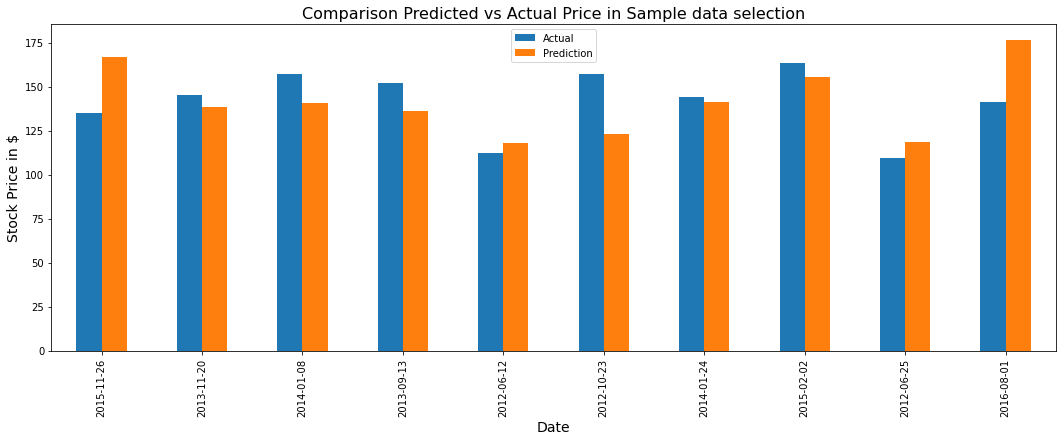

In [15]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Actual', 'Prediction'], kind='bar', ax=ax)
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

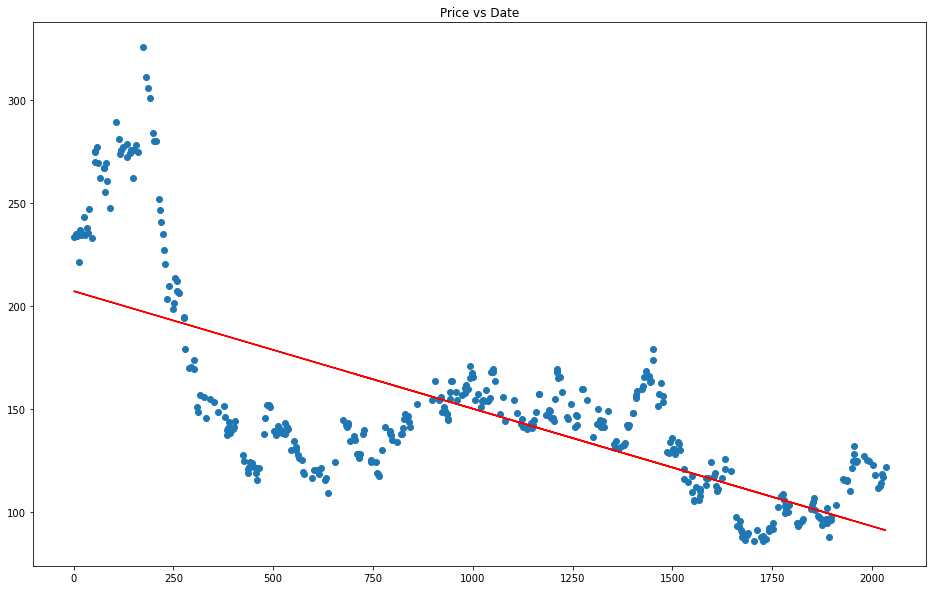

In [16]:
plt.figure(1, figsize=(16,10))
plt.title('Price vs Date')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, label='Actual Price')

In [17]:
from sklearn.metrics import explained_variance_score
#It shows that how much variation in Y is explained by the variable X. 
#For example if your r-squared is 0.86, it says that 86% of the variation in Y can be explained by X,
#while the rest is explained by some other variables not included in the model. 
#Its used as a measure of goodness of fit of the model.
explained_variance_score(y_test, y_pred)

0.5162427907586342

In [18]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [19]:
pred2=regressor.predict(X_test)
print(pred2)

[134.9965 143.866  156.1285 150.135  108.812  155.846  142.962  159.607
 112.6055 139.4315 139.3115 130.048  156.079  147.0945 147.0825 283.286
 126.4525 156.159  148.4585  94.2565 141.2845 146.215   86.735  161.9485
 123.34   113.9435 157.0445 122.12   211.0595 102.333  141.7985 140.999
 235.7065 140.524  140.624  161.468  126.2695 136.8435 142.7095 141.2555
 147.5975 156.462  210.05   103.761  124.726  311.986  278.353  118.4535
 203.7225 226.4605 130.29   118.219  128.241   97.2555 108.7845 142.956
 224.8695 273.63   120.41   123.9335 140.907  156.38   107.6035 207.921
 288.748   91.176  155.081  132.719  144.986  146.959  264.748  243.397
 156.3965 259.6865 140.8605 100.0755 158.6425 167.5815 167.07    99.5675
 153.901   87.779  144.223  142.066  159.7075 141.4475 136.0425 104.5655
 119.233  149.2045 153.2225 220.9755 138.53   134.3705 141.852  239.9215
 113.3635 130.6035 232.6925 141.081  211.3955 137.9325 142.189  212.1005
 158.9445 111.3055 150.4675 137.99   163.9185 141.327  27

In [20]:
df_sample2=pd.DataFrame({'Date':test['Date'],'Actual':y_test,'Prediction':pred2,'Error':(y_test-pred2)}).head(20)
df_sample2

,Date,Actual,Prediction,Error
704,2015-11-26,134.95,134.9965,-0.0465
1200,2013-11-20,145.35,143.8660,1.4840
1166,2014-01-08,157.10,156.1285,0.9715
1245,2013-09-13,152.15,150.1350,2.0150
1559,2012-06-12,112.05,108.8120,3.2380
1467,2012-10-23,156.95,155.8460,1.1040
1154,2014-01-24,144.25,142.9620,1.2880
906,2015-02-02,163.60,159.6070,3.9930
1550,2012-06-25,109.45,112.6055,-3.1555
536,2016-08-01,141.00,139.4315,1.5685


In [21]:
explained_variance_score(y_test, pred2)*100

99.6679401470566